## Conventions
* スペルミス
* 文頭は大文字(コロン，疑問符)
* 文字数も関係してる気がする(スペルミスなどが多いのに点数が高かったり，少ないのに点数が低かったりするため)
* 引用の後は大文字になっているか
* 曜日，月，祝日は大文字
* 小文字，句読点の間違い
* 固有表現抽出(https://qiita.com/m__k/items/ffd3b7774f2fde1083fa#%E5%9B%BA%E6%9C%89%E8%A1%A8%E7%8F%BE%E6%8A%BD%E5%87%BAnamed-entities)

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

## スペルミス
* https://qiita.com/seigot/items/3b29b4d03297c4275bb1

### pyspellchecker
* 句読点を全て削除してからが良さそう

In [4]:
%%capture
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.0 MB/s eta 0:00:00a 0:00:01


In [5]:
from spellchecker import SpellChecker

spell = SpellChecker()

In [6]:
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happening
{'happening', 'henning', 'penning'}


In [9]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [398]:
text[2]

"Dear, Principal\n\nIf u change the school policy of having a grade b average that unfair. Because many students have a C average. So that means that they cant go out for sports or other activities they want to do bad. That's like taking everything they have. What if kids want to become good at something, but now they cant because of that school policy. If they have a C average they should still be able to go out for sports or activities. A C average isn't that bad, its higher then a D average. If the school police was if you have a D average of lower they shouldn't do sports or activities. If they have a D average in school for not working hard, that's means that they in ain't going to try hard. If they have a C average and there trying hard they should be able to out for sports or activities. What if all the good people in sports have a C average in school, that means that they cant play and were going to lose every game we have. That's a good policy to get grade's up but don't take 

In [72]:
# 改行の削除
new_text = text[0].replace('\n', '')
# 句読点を抜く
new_text = new_text.replace('.', ' ')
new_text = new_text.replace(',', ' ')

new_text = new_text.replace('!', '')
new_text = new_text.replace('?', '')
new_text = new_text.replace('"', '')

new_text = new_text.replace(':', '')
new_text = new_text.replace(';', '')

# 文字列に数字が入るもの

In [73]:
new_text

"I think that students would benefit from learning at home because they wont have to change and get up early in the morning to shower and do there hair  taking only classes helps them because at there house they'll be pay more attention  they will be comfortable at home The hardest part of school is getting ready  you wake up go brush your teeth and go to your closet and look at your cloths  after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain  Then you'll have to change  with the online classes you can wear anything and stay home and you wont need to stress about what to wear most students usually take showers before school  they either take it before they sleep or when they wake up  some students do both to smell good  that causes them do miss the bus and effects on there lesson time cause they come late to school  when u have online classes u wont need to miss lessons cause you can get everything set up and go take a sh

In [74]:
text_words = new_text.split()
print(text_words)

['I', 'think', 'that', 'students', 'would', 'benefit', 'from', 'learning', 'at', 'home', 'because', 'they', 'wont', 'have', 'to', 'change', 'and', 'get', 'up', 'early', 'in', 'the', 'morning', 'to', 'shower', 'and', 'do', 'there', 'hair', 'taking', 'only', 'classes', 'helps', 'them', 'because', 'at', 'there', 'house', "they'll", 'be', 'pay', 'more', 'attention', 'they', 'will', 'be', 'comfortable', 'at', 'home', 'The', 'hardest', 'part', 'of', 'school', 'is', 'getting', 'ready', 'you', 'wake', 'up', 'go', 'brush', 'your', 'teeth', 'and', 'go', 'to', 'your', 'closet', 'and', 'look', 'at', 'your', 'cloths', 'after', 'you', 'think', 'you', 'picked', 'a', 'outfit', 'u', 'go', 'look', 'in', 'the', 'mirror', 'and', 'youll', 'either', 'not', 'like', 'it', 'or', 'you', 'look', 'and', 'see', 'a', 'stain', 'Then', "you'll", 'have', 'to', 'change', 'with', 'the', 'online', 'classes', 'you', 'can', 'wear', 'anything', 'and', 'stay', 'home', 'and', 'you', 'wont', 'need', 'to', 'stress', 'about', 'w

In [ ]:
# 正しいのにカウントされているもの
# you're
# tv
# 'がついているもの
# `がついている
# 1文字のもの
# シングルクオートがついている省略表現を列挙

In [125]:
str1 = "12345"

any(chr.isdigit() for chr in str1)

True

#### ミススペルをカウントする関数

In [303]:
def misspell_count(text):
    # 改行の削除
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    # 句読点を抜く
    text = text.replace('.', ' ')
    text = text.replace(',', ' ')
    text = text.replace('!', ' ')
    text = text.replace('?', ' ')
    # ダブルクォーテーションで囲まれているものの中身だけ取り出す
    #text = text.strip('"')
    text = text.replace('"', ' ')
    # シングルクオートをそのまま削除するのは上手くいかない
    #text = text.replace("''", ' ')   
    text = text.replace(':', ' ')
    text = text.replace(';', ' ')
    text = text.replace('/', ' ')
    text = text.replace('-', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = text.replace('_', ' ')
    #text = text.replace('\', ' ')
    
    # 固有名詞も除きたいかも
    
    text_words = text.split()
    misspelled = spell.unknown(text_words)
    count = 0
    for word in misspelled:
        # 一文字をミススペルに入れた方が相関係数が高い
        #if len(word) == 1:
         #   count = count
        # 数字が含まれる時はカウントしない
        # 数字が含まれているものも未知語としてカウントされるため
        if any(chr.isdigit() for chr in word):
            count = count
        else:
            count += 1
            # スペルミス
            #print(word)
        # 最も可能性の高い単語
        #print(spell.correction(word))
    #print(count)
    return count 

In [304]:
miss_count = []

for i in range(3911):
    check_text = text[i]
    m_count = misspell_count(check_text)
    miss_count.append(m_count)

#miss_count

#### 各目的変数ごとの平均

In [305]:
df['miss_count'] = miss_count

In [306]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,miss_count
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,1
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,4
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,1
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,7


In [307]:
df.groupby(['conventions'])['miss_count'].mean()

conventions
1.0    21.666667
1.5    11.950000
2.0     9.965174
2.5     5.977041
3.0     3.854040
3.5     2.656388
4.0     1.716942
4.5     1.877049
5.0     2.240000
Name: miss_count, dtype: float64

In [308]:
df.groupby(['grammar'])['miss_count'].mean()

grammar
1.0    16.625000
1.5    14.000000
2.0     6.615809
2.5     5.290058
3.0     4.196177
3.5     3.332955
4.0     2.691275
4.5     2.298507
5.0     2.413793
Name: miss_count, dtype: float64

In [309]:
df.groupby(['phraseology'])['miss_count'].mean()

phraseology
1.0    11.400000
1.5     9.636364
2.0     7.411429
2.5     5.483161
3.0     4.307025
3.5     3.406889
4.0     3.019892
4.5     2.648148
5.0     3.440000
Name: miss_count, dtype: float64

In [310]:
df.groupby(['vocabulary'])['miss_count'].mean()

vocabulary
1.0     4.000000
1.5    15.357143
2.0     8.395161
2.5     6.363636
3.0     4.613440
3.5     3.461768
4.0     3.112652
4.5     2.104348
5.0     3.365854
Name: miss_count, dtype: float64

In [311]:
df.groupby(['syntax'])['miss_count'].mean()

syntax
1.0    14.818182
1.5    12.137931
2.0     6.441463
2.5     5.644815
3.0     4.102400
3.5     3.237601
4.0     2.951031
4.5     2.060000
5.0     2.470588
Name: miss_count, dtype: float64

In [312]:
df.groupby(['cohesion'])['miss_count'].mean()

cohesion
1.0    22.500000
1.5    11.259259
2.0     5.869841
2.5     5.612658
3.0     4.354015
3.5     3.736842
4.0     3.011236
4.5     2.088000
5.0     2.884615
Name: miss_count, dtype: float64

#### 相関係数

In [313]:
miss_count = np.array(miss_count)
col_list = ['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions']
for i in col_list:
    conv = df[i].to_numpy()
    print(np.corrcoef(miss_count, conv))

[[ 1.        -0.2065483]
 [-0.2065483  1.       ]]
[[ 1.         -0.22868661]
 [-0.22868661  1.        ]]
[[ 1.         -0.21807884]
 [-0.21807884  1.        ]]
[[ 1.         -0.21463257]
 [-0.21463257  1.        ]]
[[ 1.         -0.23730827]
 [-0.23730827  1.        ]]
[[ 1.         -0.40318494]
 [-0.40318494  1.        ]]


* 最もたかい相関係数  0.40318494

In [ ]:
fig, ax = plt.subplots(figsize=(8.0, 10.0))
#fig = plt.figure(figsize=(14,8))
#ax = sns.jointplot(x = conv, y = miss_count, color = "#6495ED")
ax.scatter(conv, miss_count)
ax.invert_xaxis()

In [86]:
misspelled = spell.unknown(text_words)

for word in misspelled:
    # スペルミス
    print(word)
    # 最も可能性の高い単語
    print(spell.correction(word))

In [24]:
misspelled

set()

### PyEnchant(使えていない)
* pythonのスペルチェッカー

In [2]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main arm64 Packages [375 kB]
Get:5 http://deb.debian.org/debian buster/main arm64 Packages [7737 kB]
Get:6 http://deb.debian.org/debian buster-updates/main arm64 Packages [8780 B]
Fetched 8334 kB in 1s (7703 kB/s)3m                       
Reading package lists... Done
Building dependency tree       
Reading state information... Done
109 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
Suggested packages:
  aspell-do

In [8]:
#%%capture
!pip install pyenchant

In [3]:
import enchant
d = enchant.Dict("en_US")
d.check("Hello")

ImportError: The 'enchant' C library was not found and maybe needs to be installed.
See  https://pyenchant.github.io/pyenchant/install.html
for details


In [ ]:
d.check("Helo")

## 文頭の大文字

In [301]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [318]:
a = text[5].replace('\n', '')
a = a.replace('\r', '')
# コロン，?,!で区切る
a = re.split('[.?!]', a)
a

['Dear Principal,Our school should have a community center',
 ' The reasons why, are so students can learn what our community needs, how to make our community better place, and why is community important for students to know',
 ' Its a great to have a community center to know how we can make things better',
 'Students think community center takes their time away',
 ' but they have to learn what our community needs',
 ' students will participate in a group of students making a list what our community needs, therefore students will learn what our community needs',
 ' students will present their list of things our community needs',
 ' due to that students will be giving extra credit for the ones who have low grades',
 "Some students don't participate because their friends say its waste of time",
 ' it would not be waste of time when you get to know how our community can be a better place for us',
 ' students should know that the program is about our own lives, because if our community is 

In [319]:
def BOS_check(text):
    count = 0
    # 改行を無くす
    full_text = text.replace('\n', '')
    full_text = full_text.replace('\r', '')
    # コロン，?,!で区切る
    texts = re.split('[.?!]', full_text)
    for i in range(len(texts)):
        # 文を単語ごとに分割
        text = texts[i].split()
        # 文が空じゃないなら
        if text != []:
            # 一単語目の一文字目が大文字ならTrue(一文字目の前に空白があっても良い)
            if text[0].istitle():
                count = count
            else:
                count += 1
    return count

In [320]:
# 大文字から始まらない文章をカウントする
bos_count = []

for i in range(3911):
    check_text = text[i]
    bos = BOS_check(check_text)
    bos_count.append(bos)

In [321]:
df['bos_count'] = bos_count
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,miss_count,bos_count
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0,15
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,1,4
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,4,2
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,1,2
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,7,0


In [322]:
df.groupby(['cohesion'])['bos_count'].mean()

cohesion
1.0    4.100000
1.5    5.481481
2.0    2.603175
2.5    2.705063
3.0    2.172445
3.5    1.831984
4.0    1.533708
4.5    1.104000
5.0    1.076923
Name: bos_count, dtype: float64

In [323]:
df.groupby(['syntax'])['bos_count'].mean()

syntax
1.0    5.181818
1.5    4.517241
2.0    3.004878
2.5    2.373063
3.0    2.046400
3.5    1.829296
4.0    1.577320
4.5    1.380000
5.0    1.000000
Name: bos_count, dtype: float64

In [324]:
df.groupby(['vocabulary'])['bos_count'].mean()

vocabulary
1.0    10.000000
1.5     5.500000
2.0     2.604839
2.5     2.657197
3.0     2.248170
3.5     1.812314
4.0     1.864818
4.5     1.417391
5.0     1.365854
Name: bos_count, dtype: float64

In [325]:
df.groupby(['phraseology'])['bos_count'].mean()

phraseology
1.0    6.600000
1.5    2.454545
2.0    2.900000
2.5    2.378238
3.0    2.228968
3.5    1.842842
4.0    1.678119
4.5    1.333333
5.0    0.960000
Name: bos_count, dtype: float64

In [326]:
df.groupby(['grammar'])['bos_count'].mean()

grammar
1.0    9.875000
1.5    4.300000
2.0    2.628676
2.5    2.449123
3.0    2.054326
3.5    1.872727
4.0    1.590604
4.5    1.559701
5.0    0.793103
Name: bos_count, dtype: float64

In [327]:
df.groupby(['conventions'])['bos_count'].mean()

conventions
1.0    5.533333
1.5    4.050000
2.0    3.350746
2.5    2.700255
3.0    2.164205
3.5    1.519824
4.0    1.330579
4.5    1.237705
5.0    1.120000
Name: bos_count, dtype: float64

#### 相関係数

In [328]:
bos_count = np.array(bos_count)
col_list = ['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions']
for i in col_list:
    col = df[i].to_numpy()
    print(np.corrcoef(bos_count, col))

[[ 1.         -0.15655561]
 [-0.15655561  1.        ]]
[[ 1.         -0.14364267]
 [-0.14364267  1.        ]]
[[ 1.         -0.11222132]
 [-0.11222132  1.        ]]
[[ 1.        -0.1289345]
 [-0.1289345  1.       ]]
[[ 1.         -0.13411744]
 [-0.13411744  1.        ]]
[[ 1.       -0.214163]
 [-0.214163  1.      ]]


## 文字数，単語数のカウント

In [340]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [342]:
a = text[16].replace('\n', ' ')
a = a.replace('\r', ' ')
words_count = len(a.split())
words_count

393

In [343]:
def word_count(text):
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('.', ' ')
    text = text.replace(',', ' ')
    text = text.replace('!', ' ')
    text = text.replace('?', ' ')
    # ダブルクォーテーションで囲まれているものの中身だけ取り出す
    #text = text.strip('"')
    text = text.replace('"', ' ')
    # シングルクオートをそのまま削除するのは上手くいかない
    #text = text.replace("''", ' ')   
    text = text.replace(':', ' ')
    text = text.replace(';', ' ')
    text = text.replace('/', ' ')
    text = text.replace('-', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = text.replace('_', ' ')
    num_word = len(text.split())
    return num_word

In [344]:
# 大文字から始まらない文章をカウントする
num_words = []

for i in range(3911):
    check_text = text[i]
    count = word_count(check_text)
    num_words.append(count)

In [345]:
df['word_count'] = num_words
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,262
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,727
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234


## 総合

In [348]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
df['miss_count'] = miss_count
df['bos_count'] = bos_count
df['word_count'] = num_words
df['miss_rate'] = df['miss_count']/df['word_count']
df['bos_rate'] = df['bos_count']/df['word_count']

In [349]:
df.head(50)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,miss_count,bos_count,word_count,miss_rate,bos_rate
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0,15,262,0.000000,0.057252
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,1,4,533,0.001876,0.007505
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,4,2,320,0.012500,0.006250
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,1,2,727,0.001376,0.002751
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,7,0,234,0.029915,0.000000
5,004AC288D833,"Dear Principal,\r\n\r\nOur school should have ...",3.5,4.0,4.0,3.5,3.5,4.0,0,14,329,0.000000,0.042553
6,005661280443,Imagine if you could prove other people that y...,3.5,4.0,3.5,3.5,4.0,4.0,1,0,431,0.002320,0.000000
7,008DDDDD8E8D,I think it's a good idea for the estudnets to ...,2.5,2.5,2.5,2.5,2.5,2.0,22,4,387,0.056848,0.010336
8,009BCCC61C2A,positive attitude is the key to success. I agr...,3.0,3.0,3.5,3.5,3.0,3.0,10,1,571,0.017513,0.001751
9,009F4E9310CB,Asking more than one person for and advice hel...,3.0,3.0,3.5,2.5,3.0,2.5,2,6,398,0.005025,0.015075


In [350]:
a = df['bos_rate'].to_numpy()
col_list = ['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions']
for i in col_list:
    col = df[i].to_numpy()
    print(np.corrcoef(a, col))

[[ 1.         -0.22176186]
 [-0.22176186  1.        ]]
[[ 1.         -0.20052666]
 [-0.20052666  1.        ]]
[[ 1.         -0.19412703]
 [-0.19412703  1.        ]]
[[ 1.         -0.19799324]
 [-0.19799324  1.        ]]
[[ 1.         -0.15859802]
 [-0.15859802  1.        ]]
[[ 1.         -0.25271956]
 [-0.25271956  1.        ]]


In [351]:
a = df['miss_rate'].to_numpy()
col_list = ['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions']
for i in col_list:
    col = df[i].to_numpy()
    print(np.corrcoef(a, col))

[[ 1.         -0.30165381]
 [-0.30165381  1.        ]]
[[ 1.         -0.31441128]
 [-0.31441128  1.        ]]
[[ 1.         -0.32759314]
 [-0.32759314  1.        ]]
[[ 1.         -0.30803942]
 [-0.30803942  1.        ]]
[[ 1.        -0.2834608]
 [-0.2834608  1.       ]]
[[ 1.         -0.46976156]
 [-0.46976156  1.        ]]


* 全体において最も高い相関　0.46976156

In [363]:
# ミススペルと文頭の大文字のミスから算出

a = df['bos_rate'] + (df['miss_rate'] * 1.4)
col_list = ['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions']
for i in col_list:
    col = df[i].to_numpy()
    print(np.corrcoef(a, col))

[[ 1.         -0.34588964]
 [-0.34588964  1.        ]]
[[ 1.         -0.34943788]
 [-0.34943788  1.        ]]
[[ 1.         -0.35872923]
 [-0.35872923  1.        ]]
[[ 1.         -0.34291009]
 [-0.34291009  1.        ]]
[[ 1.        -0.3070086]
 [-0.3070086  1.       ]]
[[ 1.         -0.50512497]
 [-0.50512497  1.        ]]


* 文頭 + 1.4 * ミススペル　　0.50512497

In [331]:
text = df['full_text']

In [333]:
text[16]

"A positive attitude is the key for be successful person in the life make our days happy and interesting, because all do you need to do is be pleasant with yourself and the people around you, if you have a good position a way of thinking or feeling the things around you make your attitude positive.\n\nExample: If you are a worker of costumer service the costumer say bad things about you like you are not a good worker somethings like that, but you don't change your attitude because you know the costumer always have the reason, you never has to change your mind you know your position your attitude has to be positive and continue work with a great attitude.\n\nMaintain positive attitude can help you for a lot reasons. When you see the face from another person and you look his face tired, angry or mad, now you know that person don't have a positive attitude in his life or his environment, show a good face is important because the peoples know if you are ready for star doing something be ac

In [338]:
a = text[49].replace('\n', '')
a = a.replace('\r', '')
# コロン，?,!で区切る
a = re.split('[.?!]', a)
a

['Should all the students have to take a music, a drama, or an art class',
 ' Or should it be an electives and they could be able to make their choice to take what they want',
 'I believe that everyone have different opinion , interest, or things they want to do',
 " They are able to make their on decision but i don't think that it has to be required to take a class that some people aren't interested in",
 ' I am disagree with this prompt because those classes should an elective',
 " In my opion i wouldn't take any of those classes and my reason why is because i am not going to enjoy or like the class because i am not interesting in it and there's not a required that i have to take any of those classes",
 " I had a friend who didn't want to come to his art class",
 " One day i asked him why don't you go to that class and he was like i don't like the class, i don't enjoy it at all and also i didn't choice it, they just put it in my schechule",
 ' i was like look you should go to the off

In [337]:
a = text[16].replace('\n', '')
a = a.replace('\r', '')
# コロン，?,!で区切る
a = re.split('[.?!]', a)
a

['A positive attitude is the key for be successful person in the life make our days happy and interesting, because all do you need to do is be pleasant with yourself and the people around you, if you have a good position a way of thinking or feeling the things around you make your attitude positive',
 "Example: If you are a worker of costumer service the costumer say bad things about you like you are not a good worker somethings like that, but you don't change your attitude because you know the costumer always have the reason, you never has to change your mind you know your position your attitude has to be positive and continue work with a great attitude",
 'Maintain positive attitude can help you for a lot reasons',
 " When you see the face from another person and you look his face tired, angry or mad, now you know that person don't have a positive attitude in his life or his environment, show a good face is important because the peoples know if you are ready for star doing something 

## LightGBMでの予測

In [364]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,miss_count,bos_count,word_count,miss_rate,bos_rate
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0,15,262,0.000000,0.057252
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,1,4,533,0.001876,0.007505
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,4,2,320,0.012500,0.006250
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,1,2,727,0.001376,0.002751
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,7,0,234,0.029915,0.000000


In [371]:
import lightgbm as lgbm

from sklearn.model_selection import train_test_split

In [372]:
x = df[['miss_count','bos_count','word_count','miss_rate','bos_rate']]
y = df['conventions']

In [375]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.3, random_state=3655)

In [379]:

categorical_features = []

#LightGBM用の訓練データセットを作成
lgb_train = lgb.Dataset(x_train,y_train,categorical_feature=categorical_features,free_raw_data=False)

#LightGBM用の評価データセットを作成
lgb_eval = lgb.Dataset(x_valid,y_valid,reference=lgb_train,categorical_feature=categorical_features,free_raw_data=False)


#ハイパーパラメータを設定
params = {
    'boosting_type': 'gbdt',

    #'objective': 'binary', 二値分類
    'objective': 'regression', #回帰
    
    'metric':'rmse',
    #'metric': {'l2', 'l1'}, 

    'num_leaves': 10,
    'learning_rate': 0.05,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.8,
    #'bagging_freq': 5,
    #'vervose': 0
    
}

#LightGBMの学習
lgbm_model = lgbm.train(params,lgb_train,
                 valid_sets=[lgb_train,lgb_eval],
                 verbose_eval=10,
                 num_boost_round=100,
                 early_stopping_rounds= 20)

#最もスコアの良いモデルの保存
optimum_boost_rounds = lgbm_model.best_iteration

#LightGBMの予測
y_pred = lgbm_model.predict(x_valid,num_interation=lgbm_model.best_iteration)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 2737, number of used features: 5
[LightGBM] [Info] Start training from score 3.071246
Training until validation scores don't improve for 20 rounds
[10]	training's rmse: 0.60747	valid_1's rmse: 0.605989
[20]	training's rmse: 0.57837	valid_1's rmse: 0.584795
[30]	training's rmse: 0.564741	valid_1's rmse: 0.577608
[40]	training's rmse: 0.557666	valid_1's rmse: 0.575333
[50]	training's rmse: 0.553032	valid_1's rmse: 0.575127
[60]	training's rmse: 0.549615	valid_1's rmse: 0.575744
Early stopping, best iteration is:
[46]	training's rmse: 0.554705	valid_1's rmse: 0.574914
[LightGBM] [Warning] Unknown parameter: num_interation


## 線形回帰

In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [383]:
y_pred = lr.predict(x_valid) 
mean_squared_error(y_valid, y_pred,squared=False) # RMSE

0.5832381459822951

# word count

In [384]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,miss_count,bos_count,word_count,miss_rate,bos_rate
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0,15,262,0.000000,0.057252
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,1,4,533,0.001876,0.007505
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,4,2,320,0.012500,0.006250
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,1,2,727,0.001376,0.002751
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,7,0,234,0.029915,0.000000


In [385]:
# 単語数と評価の相関

a = df['word_count']
col_list = ['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions']
for i in col_list:
    col = df[i].to_numpy()
    print(np.corrcoef(a, col))

[[1.         0.21959199]
 [0.21959199 1.        ]]
[[1.         0.18890172]
 [0.18890172 1.        ]]
[[1.         0.27140807]
 [0.27140807 1.        ]]
[[1.         0.21438339]
 [0.21438339 1.        ]]
[[1.         0.08084063]
 [0.08084063 1.        ]]
[[1.         0.14374432]
 [0.14374432 1.        ]]


<AxesSubplot:xlabel='conventions', ylabel='miss_rate'>

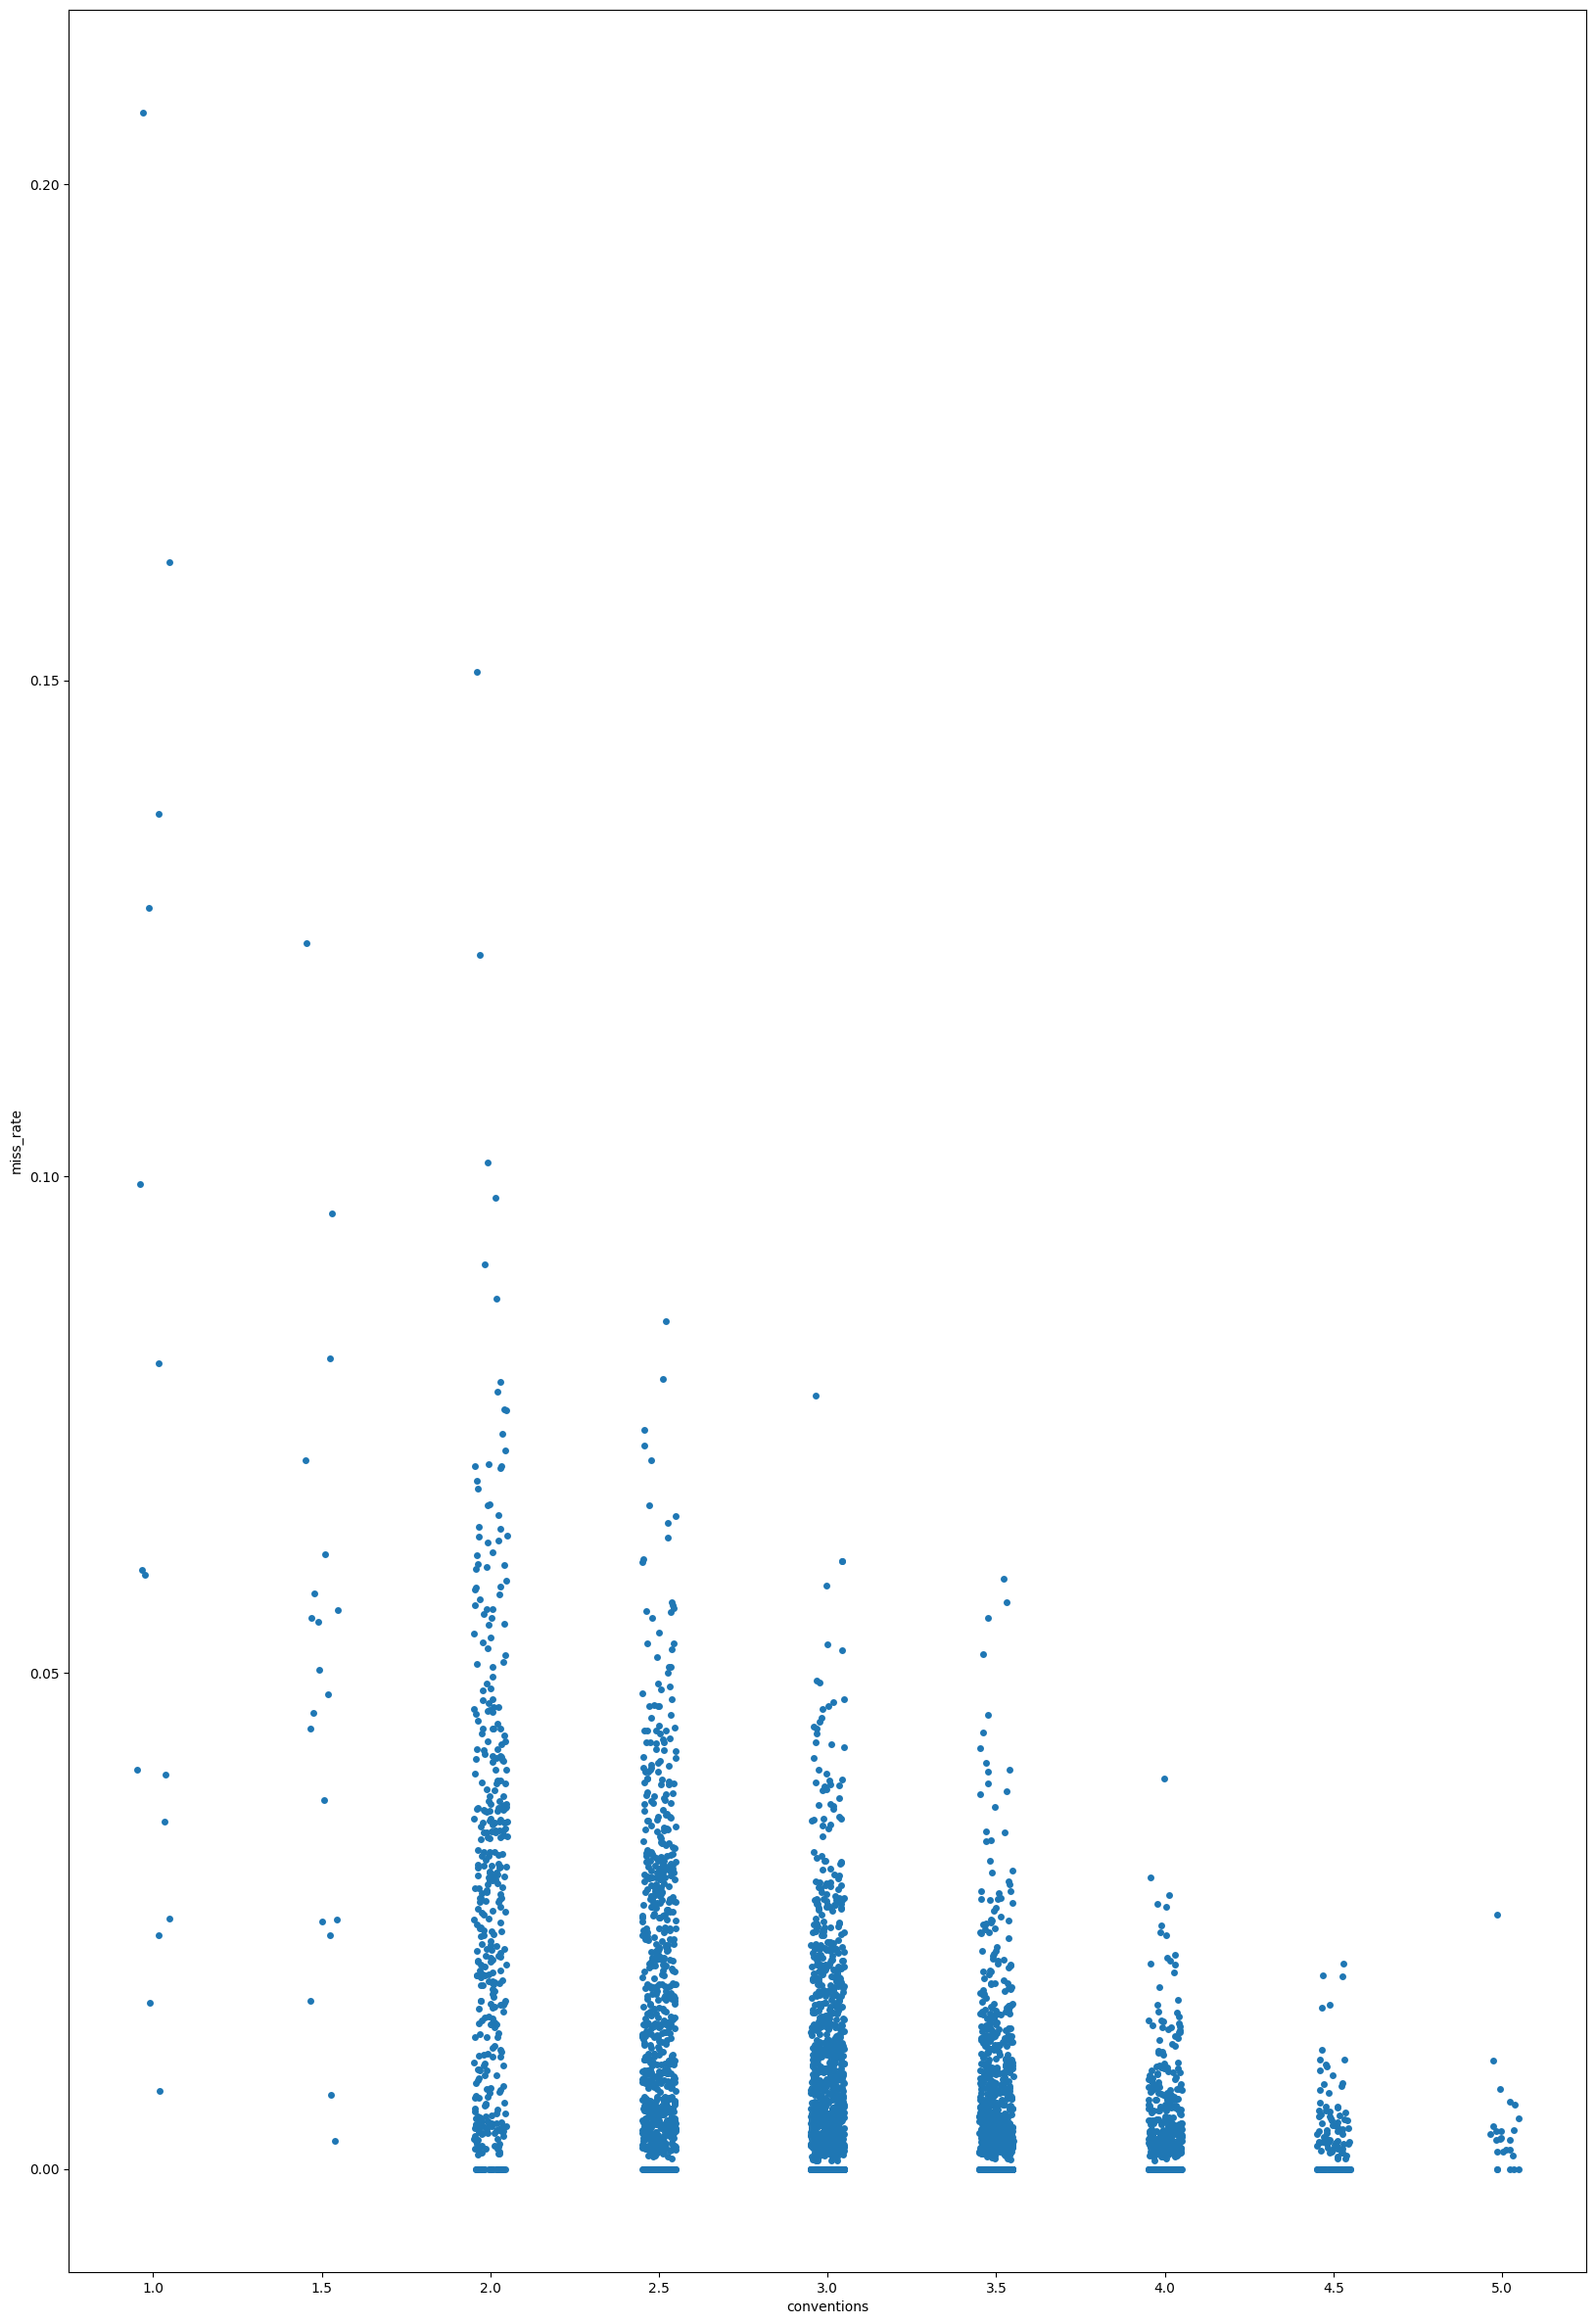

In [390]:
#x = df['conventions']
#y = df['miss_count']
plt.figure(figsize=(20, 30))
#plt.scatter(x, y)
sns.stripplot(x="conventions", y="miss_rate", data = df)

<AxesSubplot:xlabel='conventions', ylabel='miss_rate'>

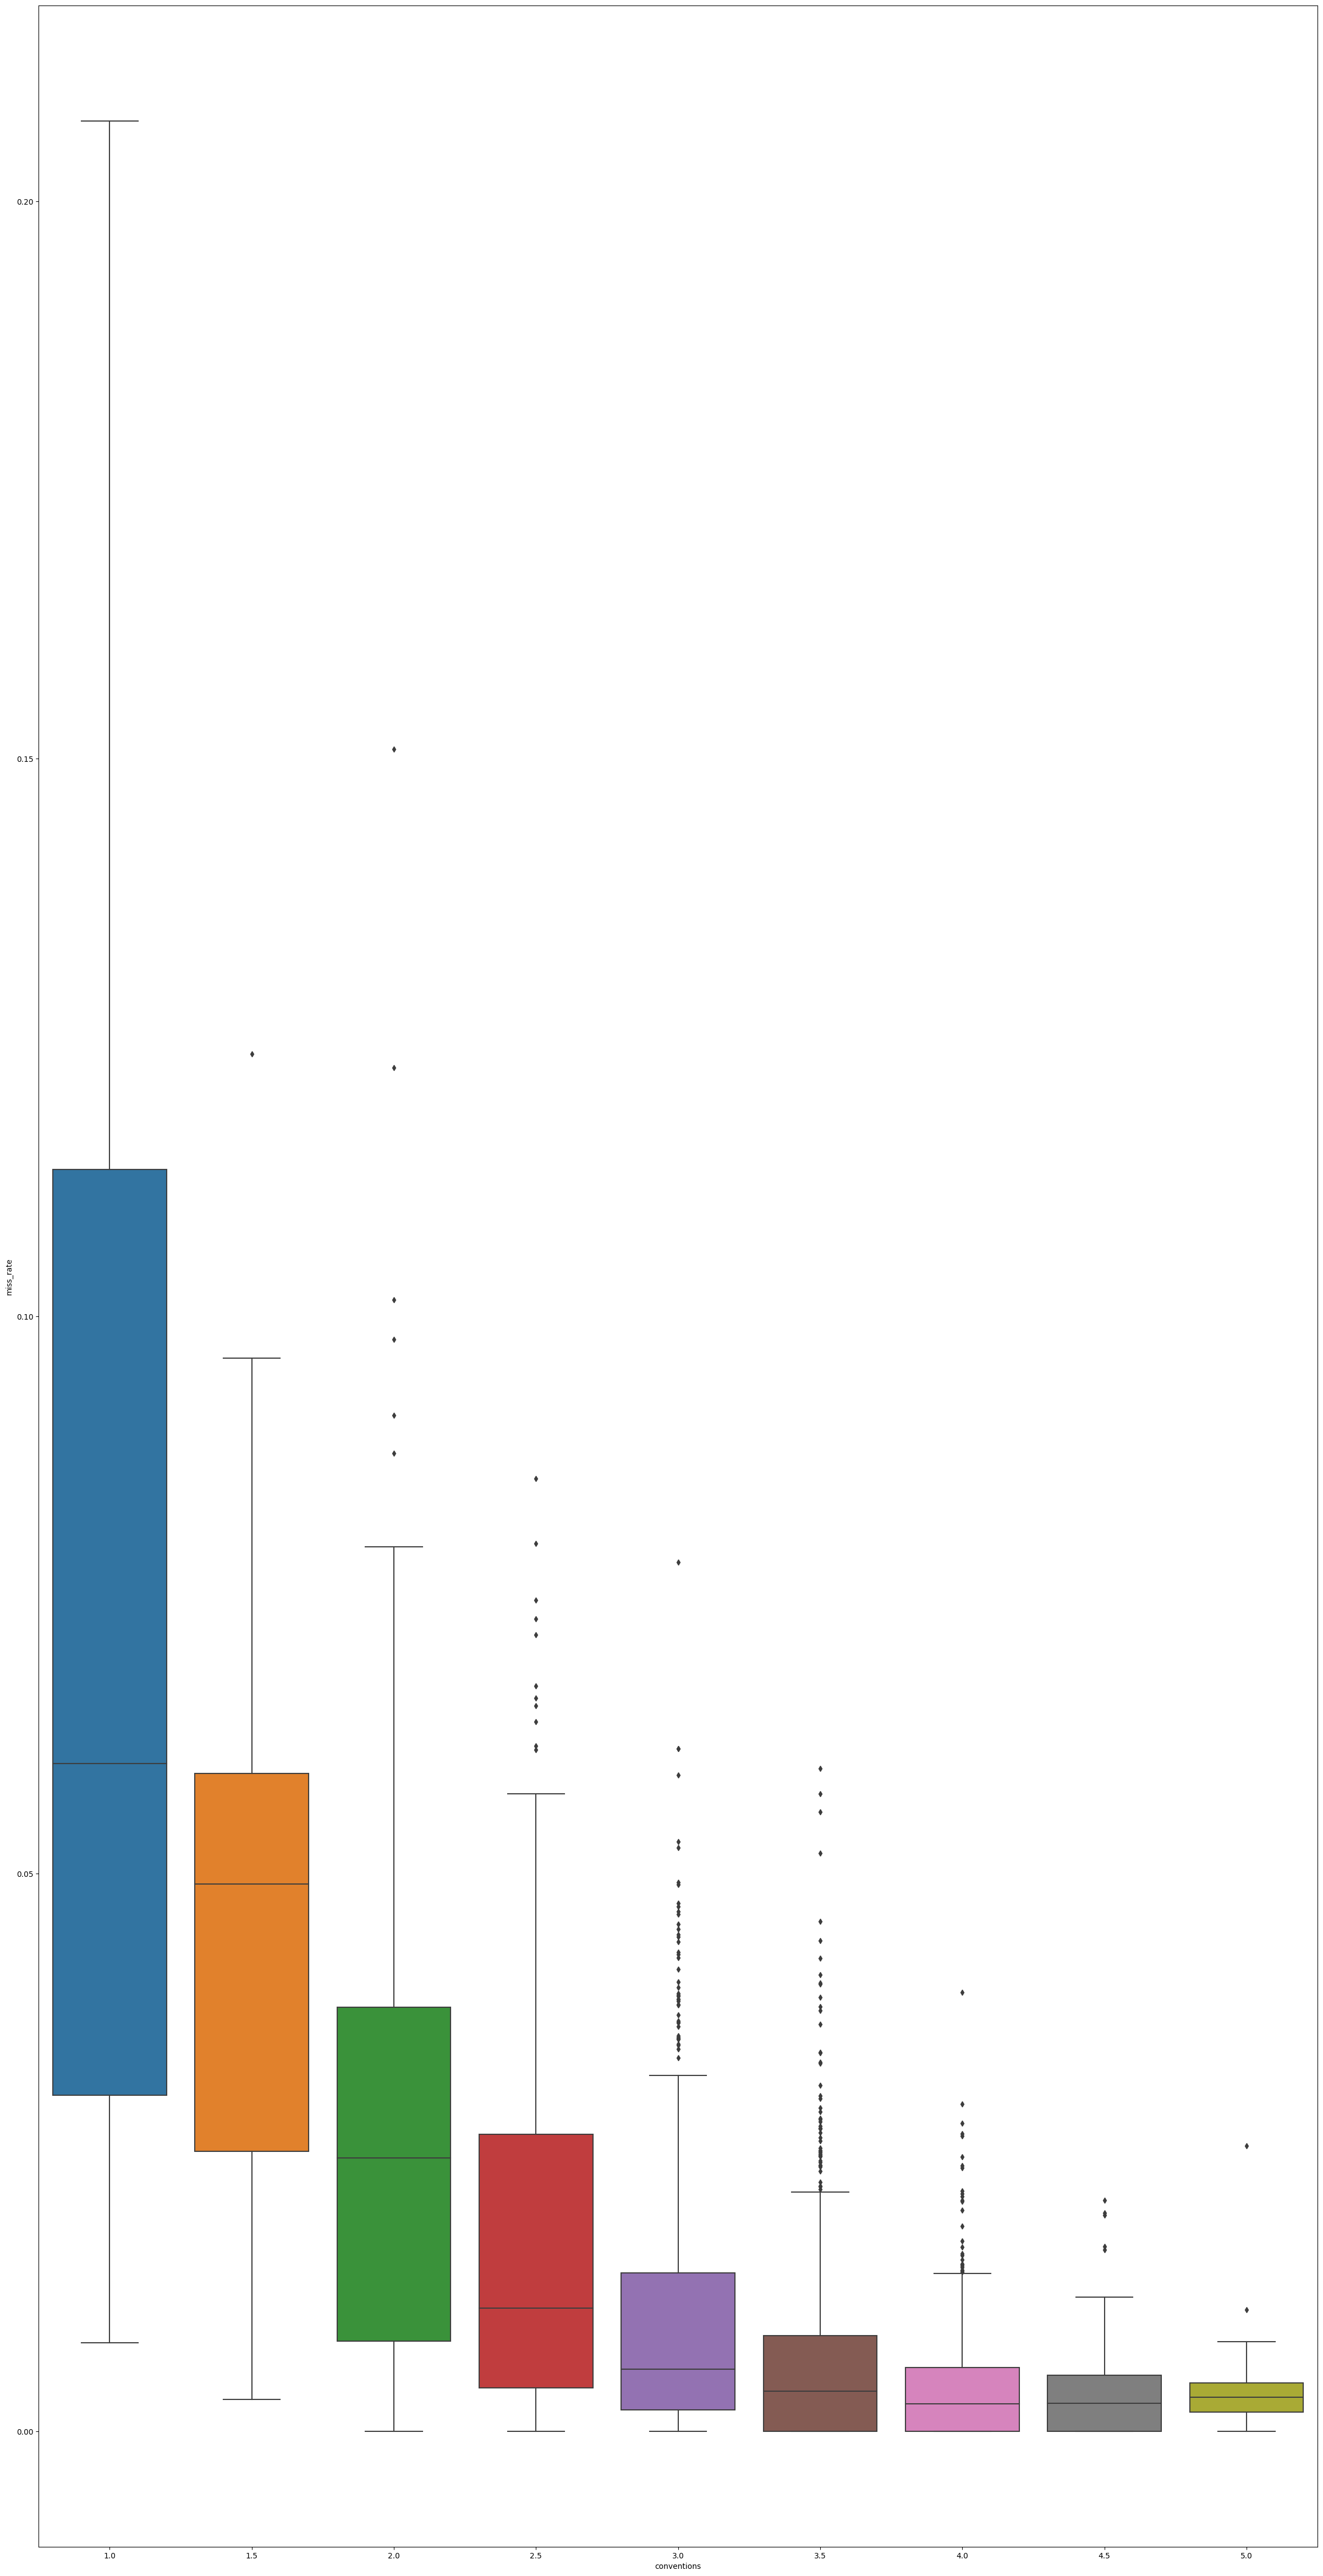

In [397]:
plt.figure(figsize=(30, 60))
sns.boxplot(x="conventions", y="miss_rate", data = df)